Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([3, 3, 256, 256])


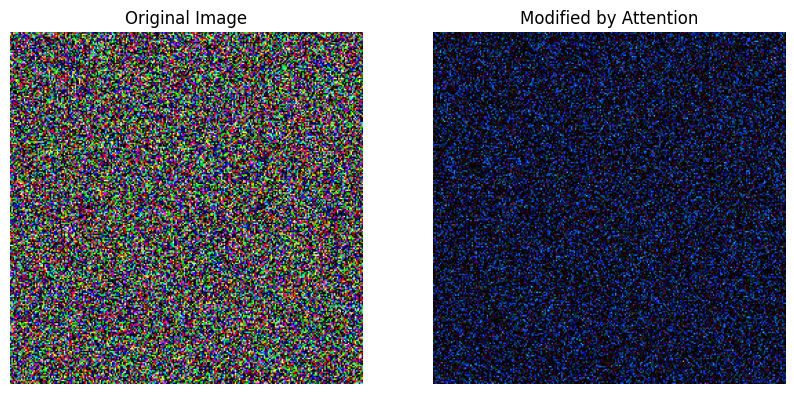

In [21]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

class ImageSelfAttention(nn.Module):
    def __init__(self, embed_size, heads):
        super(ImageSelfAttention, self).__init__()
        self.attention = nn.MultiheadAttention(embed_dim=embed_size, num_heads=heads)
    
    def forward(self, x):
        # Assuming x is of shape [batch_size, channels, height, width]
        batch_size, channels, height, width = x.size()
        
        # Reshape x to [batch_size, height * width, channels] for the attention layer
        x = x.view(batch_size, channels, height * width).permute(0, 2, 1)
        
        # Apply self-attention
        attn_output, _ = self.attention(x, x, x)
        
        # Optionally reshape or process the output further
        attn_output = attn_output.permute(0, 2, 1).view(batch_size, channels, height, width)
        
        return attn_output

def plot_images(original, modified):
    # Assuming the images are in the format [channels, height, width]
    original = original.detach().numpy().transpose(1, 2, 0)
    modified = modified.detach().numpy().transpose(1, 2, 0)

    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    ax[0].imshow(original)
    ax[0].set_title("Original Image")
    ax[0].axis('off')

    ax[1].imshow(modified)
    ax[1].set_title("Modified by Attention")
    ax[1].axis('off')

    plt.show()

# Example usage
embed_size = 3  # Number of channels
heads = 3
model = ImageSelfAttention(embed_size, heads)
image = torch.randn(3, 3, 256, 256)  # Example single image

output = model(image)
print(output.shape)
plot_images(image[0], output[0])


In [22]:
def channel_shuffle(x,
                    groups):
    """
    Channel shuffle operation from 'ShuffleNet: An Extremely Efficient Convolutional Neural Network for Mobile Devices,'
    https://arxiv.org/abs/1707.01083.

    Parameters:
    ----------
    x : Tensor
        Input tensor.
    groups : int
        Number of groups.

    Returns
    -------
    Tensor
        Resulted tensor.
    """
    batch, channels, height, width = x.size()
    # assert (channels % groups == 0)
    channels_per_group = channels // groups
    x = x.view(batch, groups, channels_per_group, height, width)
    x = torch.transpose(x, 1, 2).contiguous()
    x = x.view(batch, channels, height, width)
    return x


class ChannelShuffle(nn.Module):
    """
    Channel shuffle layer. This is a wrapper over the same operation. It is designed to save the number of groups.

    Parameters:
    ----------
    channels : int
        Number of channels.
    groups : int
        Number of groups.
    """
    def __init__(self,
                 channels,
                 groups):
        super(ChannelShuffle, self).__init__()
        # assert (channels % groups == 0)
        if channels % groups != 0:
            raise ValueError('channels must be divisible by groups')
        self.groups = groups

    def forward(self, x):
        return channel_shuffle(x, self.groups)
    


In [23]:
def channel_shuffle2(x,
                     groups):
    """
    Channel shuffle operation from 'ShuffleNet: An Extremely Efficient Convolutional Neural Network for Mobile Devices,'
    https://arxiv.org/abs/1707.01083. The alternative version.

    Parameters:
    ----------
    x : Tensor
        Input tensor.
    groups : int
        Number of groups.

    Returns
    -------
    Tensor
        Resulted tensor.
    """
    batch, channels, height, width = x.size()
    # assert (channels % groups == 0)
    channels_per_group = channels // groups
    x = x.view(batch, channels_per_group, groups, height, width)
    x = torch.transpose(x, 1, 2).contiguous()
    x = x.view(batch, channels, height, width)
    return x


class ChannelShuffle2(nn.Module):
    """
    Channel shuffle layer. This is a wrapper over the same operation. It is designed to save the number of groups.
    The alternative version.

    Parameters:
    ----------
    channels : int
        Number of channels.
    groups : int
        Number of groups.
    """
    def __init__(self,
                 channels,
                 groups):
        super(ChannelShuffle2, self).__init__()
        # assert (channels % groups == 0)
        if channels % groups != 0:
            raise ValueError('channels must be divisible by groups')
        self.groups = groups

    def forward(self, x):
        return channel_shuffle2(x, self.groups)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([3, 3, 16, 16])


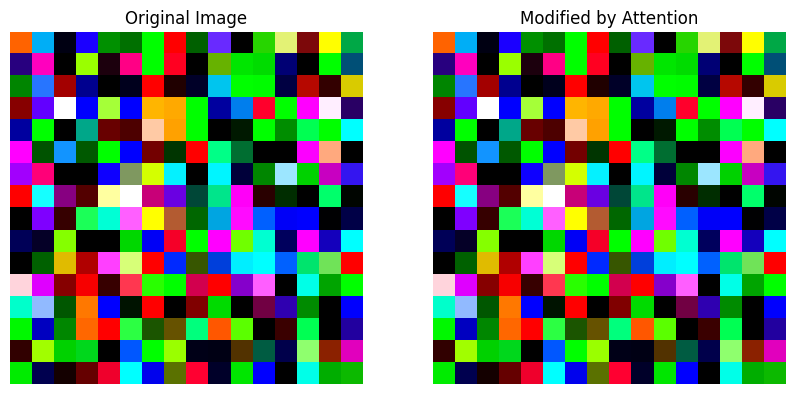

In [31]:
embed_size = 3  # Number of channels
heads = 3
model = ChannelShuffle2(embed_size, heads)
image = torch.randn(3, 3, 16, 16)  # Example single image

output = model(image)
print(output.shape)
plot_images(image[0], output[0])

